# Why neural networks?

Notebook by José Carlos Martínez Velázquez

## How a neuron works? (McCulloch-Pitts, 1943)

<img src="./NeuralNetworks_img/neuron.png" width="30%">

We have $n$ inputs (numbers): $\vec{x}^T = (x_1,...,x_n)$, $n$ weights (numbers): $\vec{x}^T = (w_1,...,w_n)$, a bias also called threshold (number): $\theta$ and also we have an activation function $\phi$. Originally the activation function is this:

$$
 \phi(x)= \left\{ \begin{array}{lcc}
             1 &   if  & x \geq 0 \\
             0 &   if  & x < 0 \\
             \end{array}
   \right.
$$

This activation function aims to imitate the biological excitation or inhibition of a neuron.

At the end of the day, the output ($\hat{y}$) of a neuron is computed like this:

$$\hat{y} = \phi(x_1w_1 + ... + x_nw_n + \theta) = \sum_{i=1}^n x_i w_i + \theta$$

Just for be compact, we add in $\vec{w}$ a new component $w_0 = \theta$ and $x_0 = 1$ in $\vec{x}$. If we do so, we can calculate the output of a neuron as:

$$\hat{y} = \phi(w^Tx) $$

The $\vec{w}$ values are the parameters that the model must learn.

## Problems with the neuron

For simplicity in the argument, we fix $n=2$. In this case, we have the following components:

* $\vec{x}^T = (1,x_1,x_2)$
* $\vec{w}^T = (w_0,w_1,w_2)$

Then:

$$\hat{y} = \phi(w_0 + x_1w_1 + x_2w_2)$$

If you look carefully at the argument of $\phi$ what the model is learning is the parameters of a straight line.

Well... Let's check at the XOR problem... ¿Could you draw a straight line separating the "+" and "-" categories?

<img src="./NeuralNetworks_img/xor_problem_unsolved.png" width="30%">

Solution: The first neural network, defining two different regions

<img src="./NeuralNetworks_img/xor_problem.png" width="30%">

# Parts of a basic (fully connected) neural network

From the first artificial neural network (ANN), new concepts were defined and modifications were performed. Let's introduce some notation. Imagine a neural network with 4 inputs, two hidden layers (two and three neurons respectively) and one output layer with only a neuron (output layers can have more than one neuron).


<img src="./NeuralNetworks_img/nn_example.png" width="40%">





In order to have a simple neural network, we need to know the following concepts:

* Input Layer vs. Hidden layers vs. Output layers: we need to disgregate between input, hidden and output layers. Input layer contains just the $\vec{x}$ values, hidden layers contains the values of activations in the previous layers and output layer contains the prediction for the input.

* Activation function: computes the intermediate activation value for a whole layer, feeding the next one.
* Forward propagation: calculate the output computing the activation of all neurons in all layers. Let's see an example in the previous network:

    the activation of the first hidden layer is calculated by

    $$A^{[1]} = \phi \left(
    \begin{bmatrix}
    1 & x_1 & x_2 & x_3 & x_4\\ 
    1 & x_1 & x_2 & x_3 & x_4
    \end{bmatrix}
    \cdot \begin{bmatrix}
    w^{[1]}_{00} & w^{[1]}_{10}\\ 
    w^{[1]}_{01} & w^{[1]}_{11}\\ 
    w^{[1]}_{02} & w^{[1]}_{12}\\ 
    w^{[1]}_{03} & w^{[1]}_{13}\\
    w^{[1]}_{04} & w^{[1]}_{14}
    \end{bmatrix}\right) = \phi \left(
    \vec{x}
    \cdot W^{[1]}\right)$$

    Where $w^{[l]}_{n,i}$ means the component $i$ of the weight vector of the neuron $n$ in the layer $l$.

    Chaining the process we have that:
    
    $$A^{[l]} = \phi \left( [1\ |\ A^{[l-1]}] \cdot W^{[l]}\right)$$

* Loss function: from a supervised learning point of view, we can define a loss function that measures how far are reality from prediction. Imagine that your example $\vec{x}$ is labeled by $y$. We can define a function $L(y,\hat{y})$ that computes how far $\hat{y}$ is from $y$.

* Backpropagation: Is the "magic" of the neural networks. When we compute forward propagation for an example, we can re-calculate weights in order to minimize the loss function. Backpropagation computes gradients (derivatives) of the loss function with respect to each weight and reasign the weights by any learning rule. The most famous is the gradient descent learning rule:
    
    $$w_{new} = w_{previous} - \eta \frac{\partial L}{w_{previous}}$$
    
    where $\eta$ is a number (usually less than 1) called learning rate, that controls how big are steps in the learning algorithm. The adjustment of $\eta$ is not easy.



# Taking a little example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
from skimage.transform import resize
import pickle
from scipy.io import loadmat
import seaborn as sns

from sklearn.utils import shuffle

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
from keras.optimizers import Adam

C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Resize the data to 100x100

In [ ]:
train_path = 'cars_train\\'
print("Reading training set...")
image_names = os.listdir(train_path)
num_images = len(image_names)

train = []
for i,name in enumerate(image_names):
    train.append(resize(plt.imread(train_path+name), output_shape = (100,100,3), mode='reflect'))
    if i%100 == 0:
        print(f'processed image {i}/{num_images}')

train = np.array(train)

with open('pickled_train','wb') as fp:
    pickle.dump(train,fp)

#train = np.array([resize(plt.imread(train_path+name), output_shape = (100,100,3), mode='reflect') for name in os.listdir(train_path)])    

## Reading, adjusting and saving training labels

In [ ]:
with open('car_devkit/train_perfect_preds.txt','r') as f:
    train_labels = f.readlines()

train_labels = [int(x.strip())-1 for x in train_labels] 

with open('pickled_train_labels','wb') as fp:
    pickle.dump(train_labels,fp)


## Let's see a sample of data

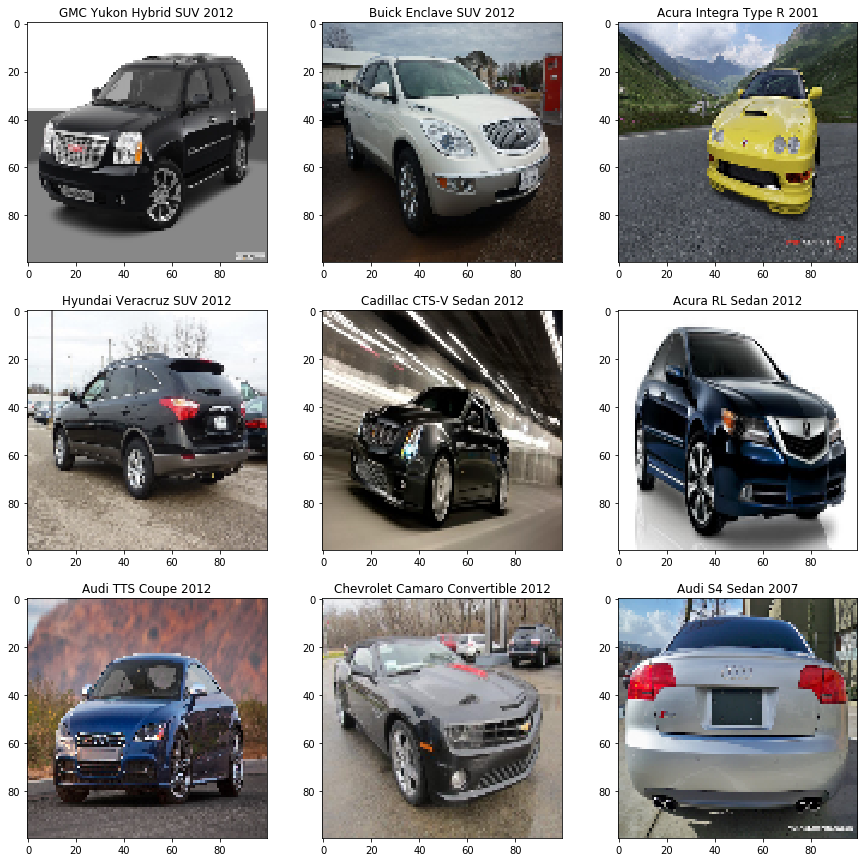

In [2]:
with open('pickled_train','rb') as fp:
    train=pickle.load(fp)
    
with open('pickled_train_labels','rb') as fp:
    train_labels=pickle.load(fp)
    

labels_info=loadmat('car_devkit/cars_meta.mat')
labels_mapping = {i:c[0] for i,c in enumerate(labels_info['class_names'][0])}

train_len = train.shape[0]
nfigs=3

idx_to_show = np.random.choice(np.arange(train_len), size=nfigs*nfigs, replace=False)

fig,ax = plt.subplots(nfigs,nfigs,figsize=(15,15))

for i in range(nfigs):
    for j in range(nfigs):
        ax[i,j].set_title(labels_mapping[train_labels[idx_to_show[ i*nfigs+j ]]])
        ax[i,j].imshow(train[idx_to_show[ i*nfigs+j ]])
        
plt.show()

## Is data balanced?

Minimum proportion: 0.0029469548133595285
Minimum proportion: 0.008349705304518664
Highest difference: 0.0054027504911591355


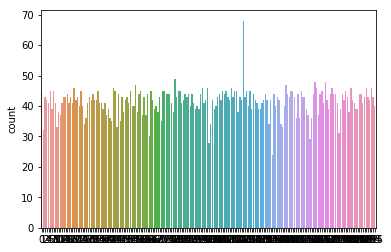

In [3]:
sns.countplot(train_labels)
mapped_labels=[labels_mapping[l] for l in train_labels]
proportion = pd.value_counts(mapped_labels)/len(mapped_labels)
print(f'Minimum proportion: {min(proportion)}')
print(f'Minimum proportion: {max(proportion)}')
print(f'Highest difference: {max(proportion)-min(proportion)}')

## Preprocessing data in order to make it able to enter into network

In [4]:
flatten_train = np.array([ e.flatten() for e in train ])
print(f'Real train shape: {train.shape}')
print(f'Flatten train shape: {flatten_train.shape}')

Real train shape: (8144, 100, 100, 3)
Flatten train shape: (8144, 30000)


In [5]:
shuffled_flatten_train, shuffled_train_labels = shuffle(flatten_train,train_labels)

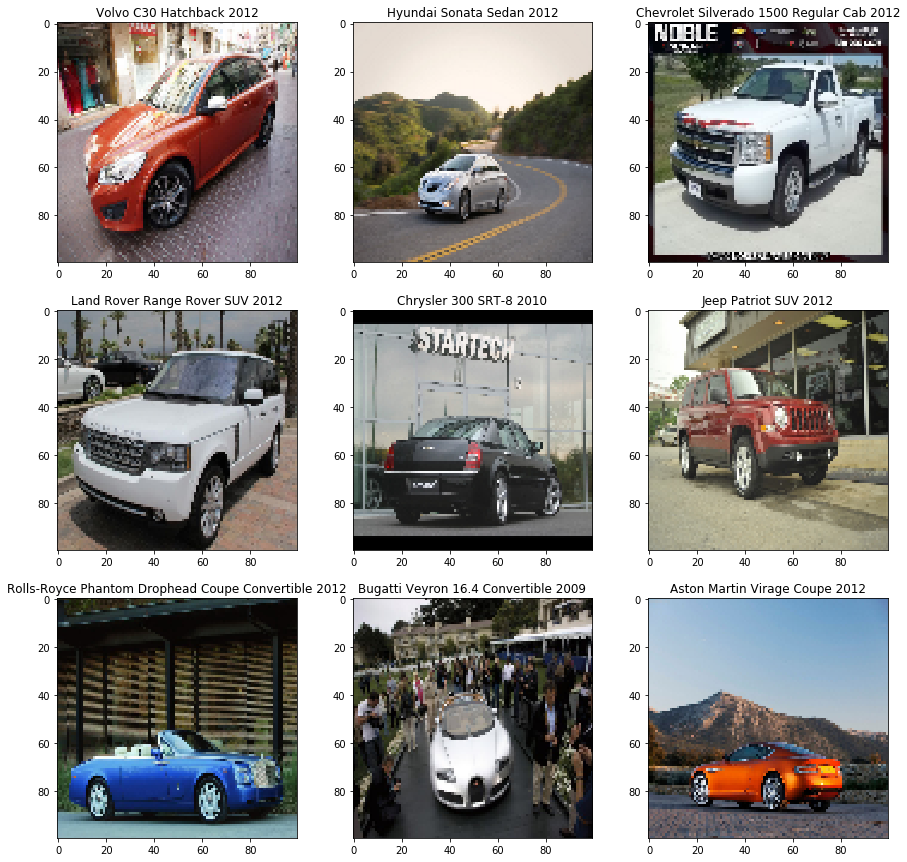

In [6]:
idx_to_show = np.random.choice(np.arange(train_len), size=nfigs*nfigs, replace=False)

fig,ax = plt.subplots(nfigs,nfigs,figsize=(15,15))

for i in range(nfigs):
    for j in range(nfigs):
        ax[i,j].set_title(labels_mapping[train_labels[idx_to_show[ i*nfigs+j ]]])
        ax[i,j].imshow(train[idx_to_show[ i*nfigs+j ]])
        
plt.show()

In [7]:
one_hot_shuffled_train_labels = to_categorical(shuffled_train_labels,np.unique(shuffled_train_labels).shape[0])

## Building the model

In [19]:
import os
ntrheads = '32'
os.environ['MKL_NUM_THREADS'] = ntrheads
os.environ['GOTO_NUM_THREADS'] = ntrheads
os.environ['OMP_NUM_THREADS'] = ntrheads
os.environ['openmp'] = 'True'

model = Sequential()
model.add( Dense(256, input_shape = (flatten_train.shape[1],), activation = 'relu',kernel_initializer='glorot_normal', name = 'my_hidden_layer') )
model.add( Dense(128, activation = 'relu',kernel_initializer='glorot_normal', name = 'my_hidden_layer1') )
model.add( Dense(len(labels_mapping.keys()), activation = 'softmax',kernel_initializer='glorot_normal' , name = 'my_output_layer') )

In [20]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-04, decay=0.0, amsgrad=True)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(shuffled_flatten_train, one_hot_shuffled_train_labels, epochs=10, batch_size=8, validation_split=0.1)

Train on 7329 samples, validate on 815 samples
Epoch 1/10
7329/7329 [==============================] - 254s 35ms/step - loss: 5.3971 - acc: 0.0061 - val_loss: 5.2811 - val_acc: 0.0037
Epoch 2/10
7329/7329 [==============================] - 251s 34ms/step - loss: 5.2793 - acc: 0.0082 - val_loss: 5.2836 - val_acc: 0.0098
Epoch 3/10
7329/7329 [==============================] - 256s 35ms/step - loss: 5.2762 - acc: 0.0082 - val_loss: 5.2861 - val_acc: 0.0098
Epoch 4/10
7329/7329 [==============================] - 256s 35ms/step - loss: 5.2753 - acc: 0.0082 - val_loss: 5.2881 - val_acc: 0.0098
Epoch 5/10
7329/7329 [==============================] - 254s 35ms/step - loss: 5.2749 - acc: 0.0082 - val_loss: 5.2901 - val_acc: 0.0098
Epoch 6/10
7329/7329 [==============================] - 257s 35ms/step - loss: 5.2743 - acc: 0.0082 - val_loss: 5.2917 - val_acc: 0.0098
Epoch 7/10
7329/7329 [==============================] - 257s 35ms/step - loss: 5.2740 - acc: 0.0082 - val_loss: 5.2929 - val_acc: 0

In [3]:
import os
ntrheads = '32'
os.environ['MKL_NUM_THREADS'] = ntrheads
os.environ['GOTO_NUM_THREADS'] = ntrheads
os.environ['OMP_NUM_THREADS'] = ntrheads
os.environ['openmp'] = 'True'


shuffled_train, shuffled_train_labels = shuffle(train,train_labels)
one_hot_shuffled_train_labels = to_categorical(shuffled_train_labels,np.unique(shuffled_train_labels).shape[0])

model = Sequential()
model.add(Conv2D(filters = 3, kernel_size=(7,7), border_mode='same',name='conv1', input_shape = train.shape[1:] ))
# model.add(Conv2D(filters = 7, kernel_size=(5,5), border_mode='same',name='conv2'))
# model.add(Conv2D(filters = 11, kernel_size=(3,3), border_mode='same',name='conv3'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(len(labels_mapping.keys()), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
model.fit(shuffled_train, one_hot_shuffled_train_labels, batch_size=64, epochs=10,verbose=1)



C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=3, kernel_size=(7, 7), name="conv1", input_shape=(100, 100,..., padding="same")`
  del sys.path[0]


Epoch 1/10
8144/8144 [==============================] - 125s 15ms/step - loss: 5.4949 - acc: 0.0037
Epoch 2/10
8144/8144 [==============================] - 123s 15ms/step - loss: 5.2752 - acc: 0.0095
Epoch 3/10
8144/8144 [==============================] - 123s 15ms/step - loss: 5.2428 - acc: 0.0108
Epoch 4/10
8144/8144 [==============================] - 123s 15ms/step - loss: 5.1837 - acc: 0.0123
Epoch 5/10
8144/8144 [==============================] - 125s 15ms/step - loss: 5.1287 - acc: 0.0147
Epoch 6/10
8144/8144 [==============================] - 123s 15ms/step - loss: 5.0484 - acc: 0.0200
Epoch 7/10
8144/8144 [==============================] - 124s 15ms/step - loss: 4.9379 - acc: 0.0355
Epoch 8/10
8144/8144 [==============================] - 124s 15ms/step - loss: 4.7463 - acc: 0.0572
Epoch 9/10
8144/8144 [==============================] - 123s 15ms/step - loss: 4.4447 - acc: 0.0925
Epoch 10/10
8144/8144 [==============================] - 123s 15ms/step - loss: 3.9819 - acc: 0.1607